In [17]:
import os
import pandas as pd
import json

path = "./output/"

df = pd.DataFrame()
# create a pandas df with the columns test_id, mode, avg_delta_pct
df = pd.DataFrame(columns=["test_id","inventory", "mode", "avg_delta_pct"])

for file in os.listdir(path):
    test_id = file[16:-5]
    mode = file[39:-5]
    inv = int(file[26])
    with open(path + file,"r") as f:
        data = json.load(f)
    r1_first = data["robot_1"]["evolution"][0] 
    r2_first = data["robot_2"]["evolution"][0] 
    r1_last = data["robot_1"]["evolution"][-1] 
    r2_last = data["robot_2"]["evolution"][-1]  
    avg_delta_pct = ((r1_first["pct"] - r1_last["pct"]) + (r2_first["pct"] - r2_last["pct"]))/.02
    # avg_delta_voltage = ((r1_first["voltage"] - r1_last["voltage"]) + (r2_first["voltage"] - r2_last["voltage"]))/2
    # add the row to the df with the needed info
    df.loc[len(df)] = [test_id, inv, mode, avg_delta_pct]

df = df.sort_values(by="inventory", ascending=True)

df

,test_id,inventory,mode,avg_delta_pct
4,test_2_5_i0_real_clean_multi3,0,multi3,8.500001
14,test_2_5_i0_real_clean_bl_0,0,bl_0,10.000002
8,test_2_5_i1_real_clean_bl_0,1,bl_0,9.500000
3,test_2_5_i1_real_clean_multi3,1,multi3,8.000001
7,test_2_5_i2_real_clean_bl_0,2,bl_0,9.999999
2,test_2_5_i2_real_clean_bl_0,2,bl_0,9.500001
18,test_2_5_i2_real_clean_multi3,2,multi3,9.500003
12,test_2_5_i3_real_clean_bl_0,3,bl_0,9.999999
20,test_2_5_i3_real_clean_multi3,3,multi3,9.499998
1,test_2_5_i4_real_clean_bl_0,4,bl_0,8.500001


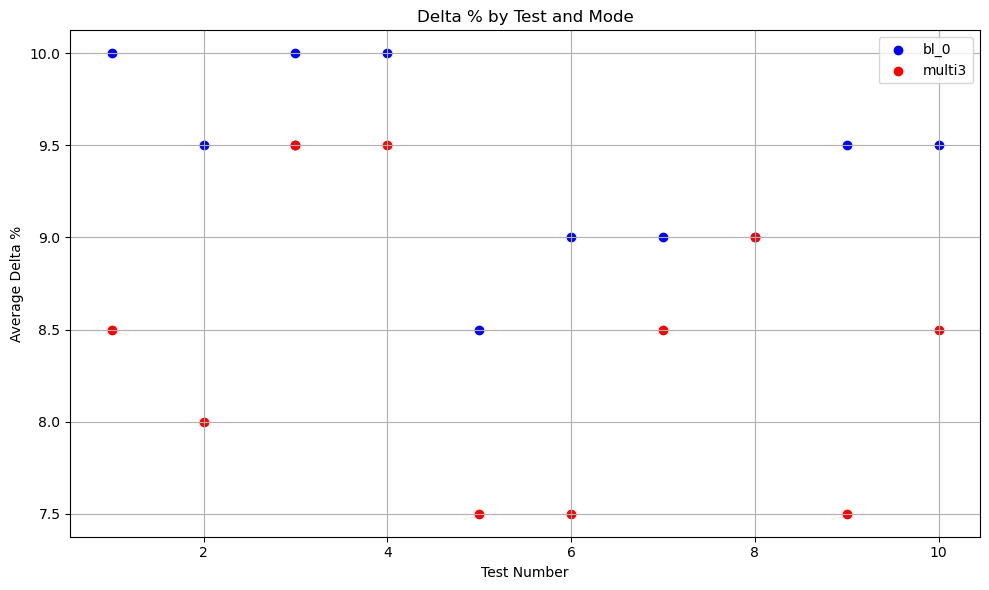

In [23]:
import matplotlib.pyplot as plt

# Reset the index to get a simple enumeration for the x-axis
df = df.reset_index(drop=True)

# Create masks for each mode
bl_0_mask = df["mode"] == "bl_0"
multi3_mask = df["mode"] == "multi3"

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df["inventory"][bl_0_mask] + 1, df["avg_delta_pct"][bl_0_mask], label="bl_0", color="blue")
plt.scatter(df["inventory"][multi3_mask] + 1, df["avg_delta_pct"][multi3_mask], label="multi3", color="red")

# Labels and title
plt.xlabel("Test Number")
plt.ylabel("Average Delta %")
plt.title("Delta % by Test and Mode")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
df["avg_delta_pct"][bl_0_mask].mean()

9.409091621637344

In [25]:
df["avg_delta_pct"][multi3_mask].mean()

8.400000184774399